# What is Count Plot?
A count plot is a type of bar chart that displays the frequency (or count) of observations in each category of a categorical variable. It's a great way to visualize the distribution of data across different categories.<br>
Count plots help you quickly understand the distribution of categorical data. They show how many data points belong to each category, making it easy to compare the frequencies of different categories.


# Use Cases
* When you want to visualize the distribution of a categorical variable.
* When you need to compare the frequencies of different categories.
* When you want a simple and intuitive way to understand the distribution of your data.

In the first portion of the lab, we will focus on several real life examples on how to use count plots using a real world dataset. We will also experiment with difference attributes of count plot for better visualization.

# Install dependencies and import libraries

In [19]:
!pip install pandas numpy matplotlib seaborn | grep -v "Requirement already satisfied"

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [21]:
import warnings
warnings.filterwarnings('ignore')

The warnings library in Python provides a way to control the display of warning messages. By using ***`filterwarnings('ignore')`***, you essentially tell Python to ignore all warning messages.

# Dataset : 2024 Fortune 1000 Companies
The dataset "2024 Fortune 1000 Companies" contains information about the top 1000 companies in the US, ranked by revenue, as of 2024. It includes various attributes like rank, company name, revenue, profits, assets, market value, employees, previous rank, CEO, industry, sector, city, state, website, years on list, and profitability. This dataset provides a snapshot of the performance and financial standing of major companies in the US. You can find the dataset on [Kaggle](https://www.kaggle.com/datasets/jeannicolasduval/2024-fortune-1000-companies)

# # (Optional) Load Dataset From Kaggle

---



> ***You can avoid this section if you want to download dataset directly from kaggle website.***

You can check the below link for better understanding on how to load dataset from Kaggle : https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/


In [22]:
# Install the kaggle library to download datasets
!pip install -q kaggle  # Installs the kaggle library using pip

# Create a directory to store Kaggle API credentials
!mkdir ~/.kaggle  # Creates a hidden directory named '.kaggle' in the user's home directory

# Copy the Kaggle API credentials file to the appropriate location
!cp kaggle.json ~/.kaggle/  # Copies the 'kaggle.json' file to the '.kaggle' directory

# Set the permissions of the Kaggle API credentials file
!chmod 600 ~/.kaggle/kaggle.json  # Changes the permissions of 'kaggle.json' to read and write for the owner only

# Download the 2024 Fortune 1000 Companies from Kaggle
!kaggle datasets download --force jeannicolasduval/2024-fortune-1000-companies  # Download the dataset via Kaggle API

# Unzip the downloaded dataset file
!unzip -o 2024-fortune-1000-companies.zip # Extracts the contents of the downloaded zip file

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/jeannicolasduval/2024-fortune-1000-companies
License(s): other
  0% 0.00/301k [00:00<?, ?B/s]
100% 301k/301k [00:00<00:00, 189MB/s]
Archive:  2024-fortune-1000-companies.zip
  inflating: fortune1000_2024.csv    
  inflating: fortune1000_2024.parquet  
  inflating: fortune1000_companies.parquet  
  inflating: fortune1000_companyinfo.parquet  


In [24]:
dataset = pd.read_csv('/content/fortune1000_2024.csv')
dataset.head()

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,...,Assets_M,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,...,252399.0,C. Douglas McMillon,U.S.,Bentonville,Arkansas,https://www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",559911.0,2024-08-05
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,yes,no,no,no,0.0,...,527854.0,Andrew R. Jassy,U.S.,Seattle,Washington,https://www.amazon.com,Public,"Market value as of July 15, 2024.",2005565.0,2024-08-05
2,3,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,no,1.0,...,352583.0,Timothy D. Cook,U.S.,Cupertino,California,https://www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3594309.0,2024-08-05
3,4,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,1.0,...,273720.0,Andrew P. Witty,U.S.,Minnetonka,Minnesota,https://www.unitedhealthgroup.com,Public,"Market value as of July 15, 2024.",474339.0,2024-08-05
4,5,Berkshire Hathaway,BRKA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,2.0,...,1069978.0,Warren E. Buffett,U.S.,Omaha,Nebraska,https://www.berkshirehathaway.com,Public,"Market value as of July 15, 2024.",937028.0,2024-08-05


# Exploring and Analyzing the Dataset

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Ticker                         959 non-null    object 
 3   Sector                         1000 non-null   object 
 4   Industry                       1000 non-null   object 
 5   Profitable                     1000 non-null   object 
 6   Founder_is_CEO                 1000 non-null   object 
 7   FemaleCEO                      1000 non-null   object 
 8   Growth_in_Jobs                 1000 non-null   object 
 9   Change_in_Rank                 1000 non-null   float64
 10  Gained_in_Rank                 1000 non-null   object 
 11  Dropped_in_Rank                1000 non-null   object 
 12  Newcomer_to_the_Fortune500     500 non-null    ob

In [26]:
# Check for missing values in each column
dataset.isnull().sum()

,0
Rank,0
Company,0
Ticker,41
Sector,0
Industry,0
Profitable,0
Founder_is_CEO,0
FemaleCEO,0
Growth_in_Jobs,0
Change_in_Rank,0


# Task 1 : Create a count plot for companies based on their sectors.
Essentially, you'll create a bar chart where each bar represents a sector and its height indicates the number of companies belonging to that sector, giving you an overview of sector representation in the Fortune 1000 list.

In [31]:
# Check for unique values
dataset['Sector'].unique()

array(['Retailing', 'Technology', 'Health Care', 'Financials', 'Energy',
       'Motor Vehicles & Parts', 'Food & Drug Stores',
       'Telecommunications', 'Food, Beverages & Tobacco',
       'Transportation', 'Media', 'Household Products',
       'Aerospace & Defense', 'Wholesalers', 'Industrials', 'Apparel',
       'Chemicals', 'Hotels, Restaurants & Leisure',
       'Engineering & Construction', 'Materials', 'Business Services'],
      dtype=object)

So, there are a few number of sectors consisting of two words. We will compress them into single word using the 1st chracter of each word for easily draw the plot.

In [34]:
# Function to combine long sectors
def combine_sectors(sector):
    words = sector.split()
    if len(words) > 1:
        new_sector = "".join([word[0] for word in words])
        return new_sector
    else:
        return sector

# Apply the function to the 'Sector' column
dataset['Sector'] = dataset['Sector'].apply(combine_sectors)

# Check for unique values again
dataset['Sector'].unique()


array(['Retailing', 'Technology', 'HC', 'Financials', 'Energy', 'MV&P',
       'F&DS', 'Telecommunications', 'FB&T', 'Transportation', 'Media',
       'HP', 'A&D', 'Wholesalers', 'Industrials', 'Apparel', 'Chemicals',
       'HR&L', 'E&C', 'Materials', 'BS'], dtype=object)

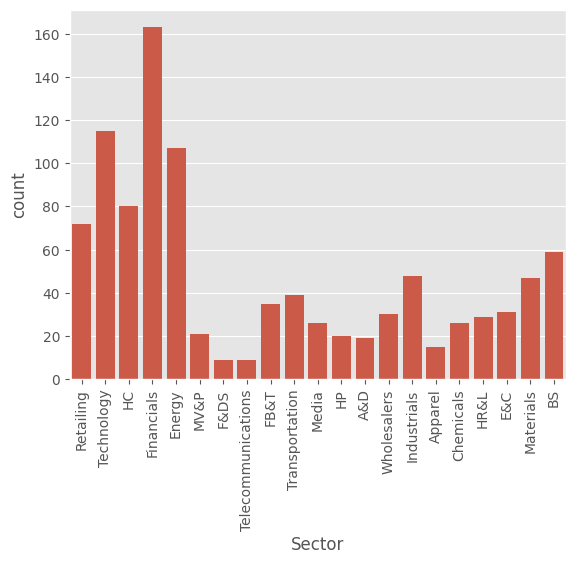

In [35]:
sns.countplot(x='Sector', data=dataset)
plt.xticks(rotation=90)
plt.show()

## Key observation from the plot
* The horizontal axis lists different sectors (e.g., Financials, Technology, Retailing) and the vertical axis shows how many items (or observations) each sector contains.
* Financials stands out as having the highest count, suggesting it dominates in terms of frequency or representation.
Technology also shows a relatively large bar, indicating a notably high count in that sector.
* Other sectors vary significantly, with some (e.g., Retailing, BS, HC) having moderate counts and several having smaller bars.
* Overall, the plot highlights that most items/observations are concentrated in a few key sectors, led by Financials and Technology.

**We can do some more enhancement of the plot by adding some attributes as below :**

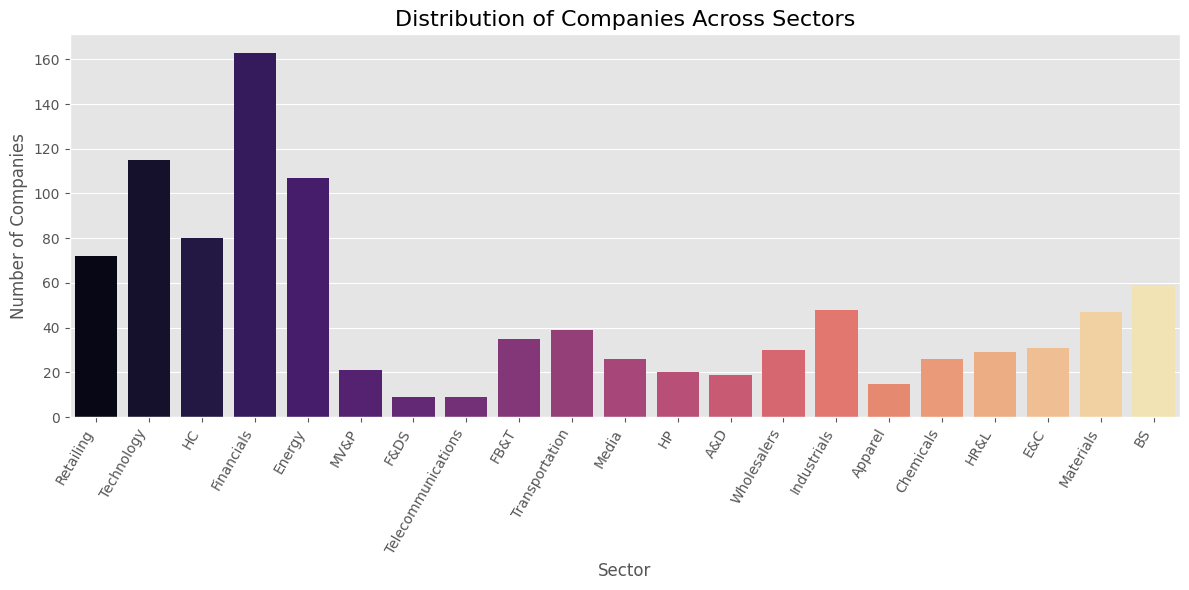

In [51]:
 # Adjust figure size for better readability
plt.figure(figsize=(12, 6))

sns.countplot(
    x='Sector',
    data=dataset,
    palette="magma"  # Use a color palette
    )

# Add a title
plt.title("Distribution of Companies Across Sectors", fontsize=16)

plt.xlabel("Sector", fontsize=12)  # Customize x-axis label
plt.ylabel("Number of Companies", fontsize=12)  # Customize y-axis label

#Rotate x-axis labels for better readability
plt.xticks(rotation=60, ha="right")


plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

# Regression Plot
